In [48]:
!pip install seaborn

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [52]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [53]:



df = df.dropna(subset=['Address'])


def clean_area(x):
    try:
        return float(x)
    except:
        return np.nan

df['Area'] = df['Area'].apply(clean_area)


df = df.dropna(subset=['Area'])
df = df[df['Area'] < 10000]  


print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   float64
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(3), int64(1), object(1)
memory usage: 171.8+ KB
None
    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     Tr

In [54]:

# d = pd.get_dummies(df, columns=['Address'], drop_first=True)
print(df.head())

    Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63.0     1     True       True      True         Shahran  1.850000e+09   
1   60.0     1     True       True      True         Shahran  1.850000e+09   
2   79.0     2     True       True      True          Pardis  5.500000e+08   
3   95.0     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123.0     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [55]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [56]:

mean_price_by_address = df.groupby('Address')['Price(USD)'].mean()


sorted_addresses = mean_price_by_address.sort_values()


n = len(sorted_addresses)
cheap = sorted_addresses[:n//3].index
mid = sorted_addresses[n//3:2*n//3].index
expensive = sorted_addresses[2*n//3:].index


def categorize_address(addr):
    if addr in cheap:
        return 'Low'
    elif addr in mid:
        return 'Mid'
    elif addr in expensive:
        return 'High'
    else:
        return 'Other'

df['Region'] = df['Address'].apply(categorize_address)

df = pd.get_dummies(df, columns=['Region'], drop_first=True)
df[['Region_Low', 'Region_Mid']] = df[['Region_Low', 'Region_Mid']].astype('int8')

df = df.drop(columns=['Address'])




In [57]:
bool_cols = ['Parking', 'Warehouse', 'Elevator']
df[bool_cols] = df[bool_cols].astype('int8')


In [58]:
# df = df.astype({col: 'int8' for col in df.columns if col.startswith('Address_')})


In [59]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price',
       'Price(USD)', 'Region_Low', 'Region_Mid'],
      dtype='object')

In [60]:
np.sum(df.isnull())

C:\Users\Davoodi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Price         0
Price(USD)    0
Region_Low    0
Region_Mid    0
dtype: int64

In [61]:

# df = df.astype({col: 'int8' for col in df.columns if col.startswith('Address_')})

bool_cols = df.select_dtypes(include=['bool']).columns

df[bool_cols] = df[bool_cols].astype('int8')

print(df[bool_cols].dtypes)
print(df.head())


Series([], dtype: object)
    Area  Room  Parking  Warehouse  Elevator         Price  Price(USD)  \
0   63.0     1        1          1         1  1.850000e+09    61666.67   
1   60.0     1        1          1         1  1.850000e+09    61666.67   
2   79.0     2        1          1         1  5.500000e+08    18333.33   
3   95.0     2        1          1         1  9.025000e+08    30083.33   
4  123.0     2        1          1         1  7.000000e+09   233333.33   

   Region_Low  Region_Mid  
0           0           1  
1           0           1  
2           1           0  
3           1           0  
4           0           0  


In [62]:
np.sum(df.duplicated())

np.int64(367)

In [63]:
df = df.drop_duplicates()
print(f'تعداد سطرها بعد از حذف تکراری‌ها: {len(df)}')


تعداد سطرها بعد از حذف تکراری‌ها: 3083


In [64]:
df['Price'].mean()

np.float64(5434674343.201752)

In [65]:
df['Price'].std()

np.float64(8350902412.682668)

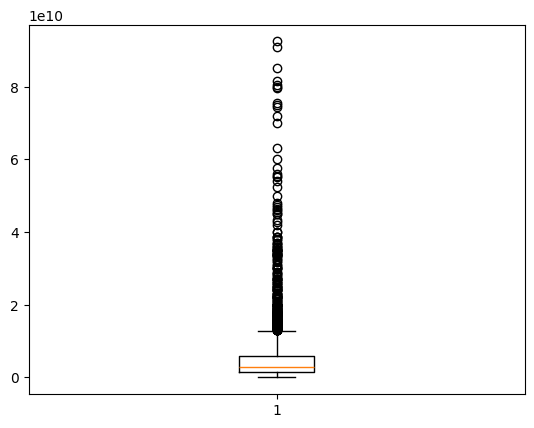

In [66]:
plt.boxplot(df['Price'])
plt.show()

In [67]:
print(df['Price'].median())


2900000000.0


In [68]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1


upper_bound = Q3 + 1.5 * IQR


df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)].copy()

print(f'تعداد نمونه‌ها قبل از حذف پرت: {len(df)}')
print(f'تعداد نمونه‌ها بعد از حذف پرت: {len(df_clean)}')
print(f'میانگین جدید قیمت‌ها: {df_clean["Price"].mean()}')
print(f'میانه جدید قیمت‌ها: {df_clean["Price"].median()}')


تعداد نمونه‌ها قبل از حذف پرت: 3083
تعداد نمونه‌ها بعد از حذف پرت: 2801
میانگین جدید قیمت‌ها: 3425900392.7483044
میانه جدید قیمت‌ها: 2500000000.0


In [69]:
print(df_clean['Price'].mean())


3425900392.7483044


In [70]:
print(df_clean['Price'].std())

2865163340.2435746


In [71]:
print(df_clean['Price'].median())

2500000000.0


In [72]:


df = df.drop_duplicates()
print(f'تعداد سطرها بعد از حذف تکراری‌ها: {len(df)}')

Q1_usd = df['Price(USD)'].quantile(0.25)
Q3_usd = df['Price(USD)'].quantile(0.75)
IQR_usd = Q3_usd - Q1_usd

lower_bound_usd = Q1_usd - 1.5 * IQR_usd
upper_bound_usd = Q3_usd + 1.5 * IQR_usd

df_clean = df[(df['Price(USD)'] >= lower_bound_usd) & (df['Price(USD)'] <= upper_bound_usd)].copy()

print(f'تعداد نمونه‌ها قبل از حذف پرت: {len(df)}')
print(f'تعداد نمونه‌ها بعد از حذف پرت: {len(df_clean)}')
print(f'میانگین جدید قیمت‌ها: {df_clean["Price(USD)"].mean():,.2f}')
print(f'میانه جدید قیمت‌ها: {df_clean["Price(USD)"].median():,.2f}')

# حالا آماده برای مدل‌سازی
X = df_clean.drop(['Price', 'Price(USD)'], axis=1)
y = df_clean['Price(USD)']




تعداد سطرها بعد از حذف تکراری‌ها: 3083
تعداد نمونه‌ها قبل از حذف پرت: 3083
تعداد نمونه‌ها بعد از حذف پرت: 2801
میانگین جدید قیمت‌ها: 114,196.68
میانه جدید قیمت‌ها: 83,333.33


In [73]:
# Train Test 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 101)

In [74]:
# Standardize


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


In [75]:
col=X.columns
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col)
X_train_scaled




,Area,Room,Parking,Warehouse,Elevator,Region_Low,Region_Mid
0,0.748553,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
1,0.708930,1.556142,0.456764,0.33663,0.542493,-0.536056,-1.038849
2,-0.321263,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
3,-0.123149,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
4,0.292891,0.057965,0.456764,0.33663,0.542493,-0.536056,-1.038849
...,...,...,...,...,...,...,...
1675,1.006102,1.556142,0.456764,0.33663,0.542493,-0.536056,-1.038849
1676,-0.638246,0.057965,0.456764,0.33663,0.542493,1.865476,-1.038849
1677,-0.578812,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
1678,-0.875983,0.057965,0.456764,0.33663,-1.843341,-0.536056,0.962604


In [76]:
X_test_scaled=sc.transform(X_test)
col=X.columns
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col)
X_test_scaled

,Area,Room,Parking,Warehouse,Elevator,Region_Low,Region_Mid
0,-0.677869,0.057965,0.456764,0.33663,-1.843341,-0.536056,0.962604
1,0.748553,1.556142,0.456764,0.33663,0.542493,1.865476,-1.038849
2,-0.103338,0.057965,0.456764,0.33663,0.542493,1.865476,-1.038849
3,-0.024092,0.057965,-2.189316,0.33663,0.542493,-0.536056,-1.038849
4,-0.043904,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
...,...,...,...,...,...,...,...
1116,-0.638246,-1.440212,-2.189316,0.33663,-1.843341,1.865476,-1.038849
1117,-0.242018,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
1118,-0.123149,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604
1119,-0.083526,0.057965,0.456764,0.33663,0.542493,-0.536056,0.962604


In [77]:
X_train= X_train_scaled
X_test= X_test_scaled

In [78]:



from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)


LinearRegression()

In [79]:
# Find Model Coefficients
# print the intercept(b0)
print(lm.intercept_)

115026.83726785713


In [80]:
# print the coefficients(b1, b2, ...)
print(lm.coef_)

[ 18276.51557969  17563.08768149   2390.16592277   2433.39606664
   7166.30874188 -68687.82059029 -55709.7087656 ]


In [81]:
predictions = lm.predict(X_test_scaled)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:', metrics.r2_score(y_test, predictions))


MAE: 36386.91586712773
MSE: 2736830338.246978
RMSE: 52314.72391446769
R2: 0.6951918211643902


<Axes: xlabel='Price(USD)', ylabel='Count'>

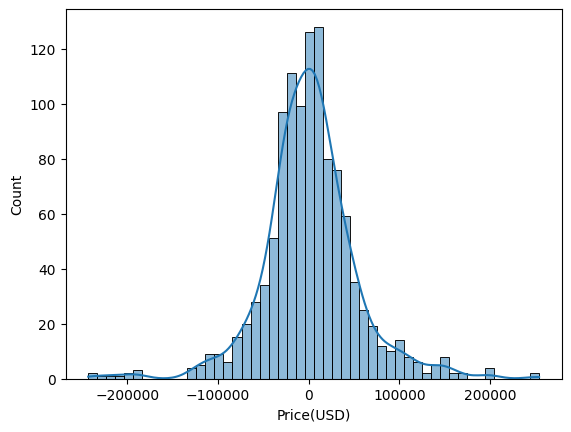

In [82]:

residual= y_test-predictions
sns.histplot(residual, bins=50, kde=True)

In [83]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('R2:', np.sqrt(metrics.r2_score(y_test, predictions)))


MAE: 36386.91586712773
MSE: 2736830338.246978
RMSE: 52314.72391446769
R2: 0.8337816387786374


تبدیل لگاریتمی روی قیمت 

In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)


lm = LinearRegression()
lm.fit(X_train_scaled, y_train_log)


y_pred_log = lm.predict(X_test_scaled)


y_pred = np.expm1(y_pred_log)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R2: {r2:.3f}")


MAE: 35,419.75
RMSE: 72,085.84
R2: 0.421
